In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
travelpony = pd.read_csv('drive/My Drive/Colab Notebooks/in class exercises/Travel Pony Facebook.csv')
travelpony.head

<bound method NDFrame.head of       Start Date  ... Cost per Page Engagement (USD)
0     2013-12-02  ...                       1.219512
1     2013-12-01  ...                       1.395349
2     2013-11-30  ...                       1.190476
3     2013-11-29  ...                       1.167315
4     2013-11-22  ...                       2.512857
...          ...  ...                            ...
3700  2013-06-11  ...                       1.050000
3701  2013-06-10  ...                       0.533333
3702  2013-06-09  ...                       0.990000
3703  2013-06-08  ...                       0.316667
3704  2013-06-07  ...                       0.000000

[3705 rows x 20 columns]>

In [0]:
travelpony_clean = travelpony[(travelpony[['Amount Spent (USD)']] != 0).all(axis=1)]

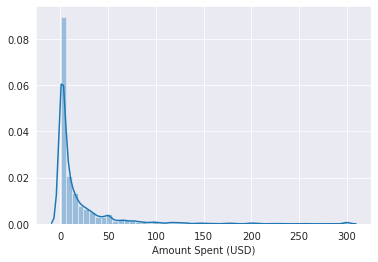

In [0]:
sns.set_style('darkgrid')
sns.distplot(travelpony_clean['Amount Spent (USD)'])

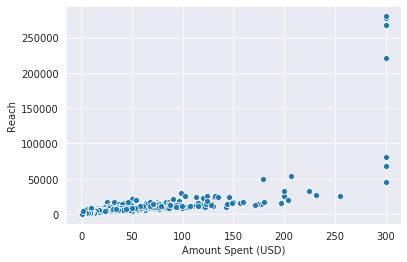

In [0]:
sns.scatterplot(x='Amount Spent (USD)', y='Reach', data=travelpony)

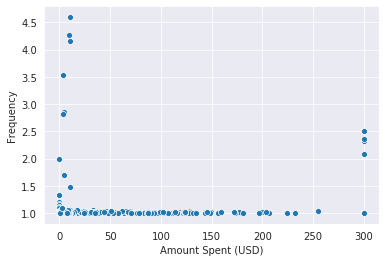

In [0]:
sns.scatterplot(x='Amount Spent (USD)', y='Frequency', data=travelpony)

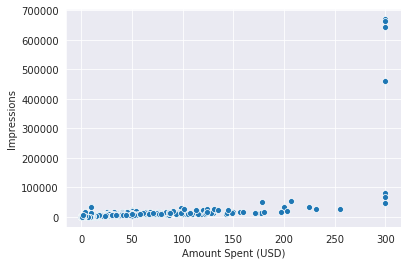

In [0]:
sns.scatterplot(x='Amount Spent (USD)', y='Impressions', data=travelpony)

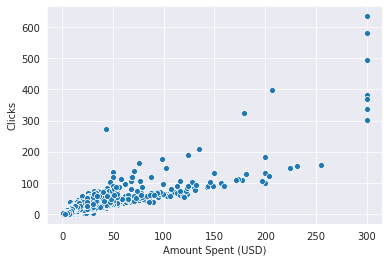

In [0]:
sns.scatterplot(x='Amount Spent (USD)', y='Clicks', data=travelpony)

**Do you see a linear relationships? As a result, do you think linear regression will work for this problem?**

I see a somewhat linear relationship for these graphs. Especially Reach and Impressions. However, there are a lot of outliers. Since there is a somewhat linear relationship, I do believe a linear regression would work for this problem. 


In [0]:
import statsmodels.api as sm

In [0]:
travelpony['Campaign Name'] = travelpony['Campaign Name'].astype('str')
travelpony['Campaign Name'] = travelpony['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]', '')
travelpony['Campaign Name'] = travelpony['Campaign Name'].str.replace('\d+', '')

In [0]:
pd.get_dummies(travelpony['Campaign Name'])
travelpony = pd.concat([travelpony, pd.get_dummies(travelpony['Campaign Name'])], axis = 1)
travelpony.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Ad,Cyber Weekend,Nanigans,Post: You need to get some real sun and we are here to,SimpleMultiFillCampaign,TravelPony: Conversion Test,TravelPony: General Ads,TravelponyPage LikesUS,http:travelponyClicksUS
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,0,1,0,0,0,0,0,0,0
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,0,1,0,0,0,0,0,0,0
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,0,1,0,0,0,0,0,0,0
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,0,1,0,0,0,0,0,0,0
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0,0,0,0,0,0,1,0,0


In [0]:
travelpony.columns

Index(['Start Date', 'End Date', 'Account', 'Campaign Name', 'Reach',
       'Frequency', 'Impressions', 'Clicks', 'Unique Clicks',
       'Amount Spent (USD)', 'Page Likes', 'Page Engagement',
       'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares',
       'Photo Views', 'Website Clicks', 'Cost per Page Like (USD)',
       'Cost per Page Engagement (USD)', 'Ad ', 'Cyber Weekend', 'Nanigans',
       'Post: You need to get some real sun and we are here to',
       'SimpleMultiFillCampaign', 'TravelPony: Conversion Test',
       'TravelPony: General Ads', 'TravelponyPage LikesUS',
       'http:travelponyClicksUS'],
      dtype='object')

In [0]:
dependent = travelpony['Amount Spent (USD)']
independent = travelpony[['Ad ', 'Cyber Weekend', 'Nanigans',
       'Post: You need to get some real sun and we are here to',
       'SimpleMultiFillCampaign', 'Reach','Frequency','Impressions',
       'Clicks','Unique Clicks','Page Likes','Page Engagement',
       'Post Engagement','Post Likes','Post Comments',
       'Post Shares','Photo Views','Website Clicks']]

model = sm.OLS(dependent, independent).fit()
predictions = model.predict(independent)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Amount Spent (USD)   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              3593.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                        0.00
Time:                        20:11:39   Log-Likelihood:                         -12193.
No. Observations:                3705   AIC:                                  2.442e+04
Df Residuals:                    3688   BIC:                                  2.453e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Ad                                                        -2.4991      2.413     -1.036      0.300      -7.229       2.231
Cyber Weekend                                           -189.1268     18.698    -10.115      0.000    -225.787    -152.467
Nanigans                                                  -4.1903      0.803     -5.216      0.000      -5.765      -2.615
Post: You need to get some real sun and we are here to   -14.2906      5.175     -2.761      0.006     -24.438      -4.144
SimpleMultiFillCampaign                                   -2.2926      0.709     -3.235      0.001      -3.682      -0.903
Reach                                                      0.0033      0.000     30.673      0.000       0.003       0.003
Frequency                                                  1.8756      0.695      2.698      0.007       0.513       3.239
Impressions                                               -0.0009   5.73e-05    -15.023      0.000      -0.001      -0.001
Clicks                                                    -0.3369      0.078     -4.312      0.000      -0.490      -0.184
Unique Clicks                                              0.4800      0.088      5.436      0.000       0.307       0.653
Page Likes                                                24.4052      6.534      3.735      0.000      11.594      37.216
Page Engagement                                          -21.1280      6.532     -3.235      0.001     -33.934      -8.322
Post Engagement                                           17.9848      5.444      3.304      0.001       7.312      28.658
Post Likes                                                 2.5928      1.092      2.374      0.018       0.452       4.734
Post Comments                                              3.5434      1.136      3.118      0.002       1.316       5.771
Post Shares                                                4.9447      1.109      4.460      0.000       2.771       7.118
Photo Views                                                3.3358      1.091      3.058      0.002       1.197       5.474
Website Clicks                                             3.5681      1.091      3.271      0.001       1.429       5.707
==============================================================================
Omnibus:                     2484.434   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251716.651
Skew:                           2.350   Prob(JB):                         0.00
Kurtosis:                      43.106   Cond. No.                     1.18e+18
======

From this regression, the three predictors with the highest predictive value are Page Likes(24.41), Post Engagement(17.98), and Post Shares(4.94). Therefore, when we spend more, we tend to get the most Page Likes first, then higher Post Engagement, and lastly, more Post Shares. 
